<a href="https://colab.research.google.com/github/spoorthi221/Complete-Python-3-Bootcamp/blob/master/Yolo_Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import drive

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Load Yolo
net = cv2.dnn.readNet("gdrive/MyDrive/yolo_object_detection/yolov3.weights", "gdrive/MyDrive/yolo_object_detection/yolov3.cfg")

In [4]:
classes = []
with open("gdrive/MyDrive/yolo_object_detection/coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

print(classes)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [11]:
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

print(layer_names)
print(output_layers)

('conv_0', 'bn_0', 'leaky_1', 'conv_1', 'bn_1', 'leaky_2', 'conv_2', 'bn_2', 'leaky_3', 'conv_3', 'bn_3', 'leaky_4', 'shortcut_4', 'conv_5', 'bn_5', 'leaky_6', 'conv_6', 'bn_6', 'leaky_7', 'conv_7', 'bn_7', 'leaky_8', 'shortcut_8', 'conv_9', 'bn_9', 'leaky_10', 'conv_10', 'bn_10', 'leaky_11', 'shortcut_11', 'conv_12', 'bn_12', 'leaky_13', 'conv_13', 'bn_13', 'leaky_14', 'conv_14', 'bn_14', 'leaky_15', 'shortcut_15', 'conv_16', 'bn_16', 'leaky_17', 'conv_17', 'bn_17', 'leaky_18', 'shortcut_18', 'conv_19', 'bn_19', 'leaky_20', 'conv_20', 'bn_20', 'leaky_21', 'shortcut_21', 'conv_22', 'bn_22', 'leaky_23', 'conv_23', 'bn_23', 'leaky_24', 'shortcut_24', 'conv_25', 'bn_25', 'leaky_26', 'conv_26', 'bn_26', 'leaky_27', 'shortcut_27', 'conv_28', 'bn_28', 'leaky_29', 'conv_29', 'bn_29', 'leaky_30', 'shortcut_30', 'conv_31', 'bn_31', 'leaky_32', 'conv_32', 'bn_32', 'leaky_33', 'shortcut_33', 'conv_34', 'bn_34', 'leaky_35', 'conv_35', 'bn_35', 'leaky_36', 'shortcut_36', 'conv_37', 'bn_37', 'leaky_

(367, 551, 3)


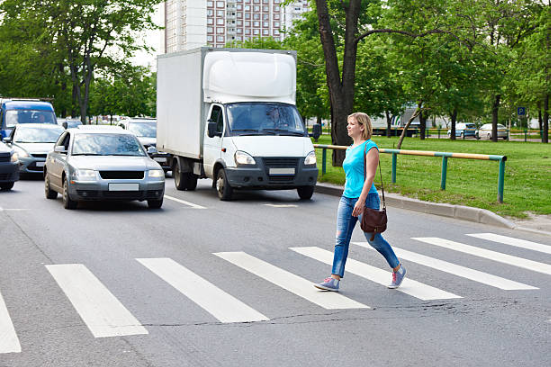

In [12]:
# Loading image
img = cv2.imread("gdrive/MyDrive/yolo_object_detection/yaayy.jpg")
img = cv2.resize(img, None, fx=0.9, fy=0.9)
height, width, channels = img.shape
print(img.shape)
cv2_imshow(img)

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
# Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
print(blob)

[[[[0.6664     0.77616    0.94864    ... 0.96432    0.53312004
    0.81536   ]
   [0.8624     0.93688    0.82712    ... 0.93688    0.49392
    0.65464   ]
   [0.94864    0.88984    0.59976    ... 0.9016     0.48216
    0.5096    ]
   ...
   [0.6272     0.63896    0.63112    ... 0.60368    0.59584
    0.5684    ]
   [0.62328    0.61936    0.60368    ... 0.60368    0.61152
    0.58408   ]
   [0.56448    0.58016    0.57624    ... 0.61544    0.63504
    0.61152   ]]

  [[0.68208003 0.79968    0.96432    ... 0.94864    0.50568
    0.8036    ]
   [0.87024003 0.93688    0.84672    ... 0.93688    0.50176
    0.68208003]
   [0.9408     0.89376    0.63896    ... 0.90944004 0.5096
    0.55272   ]
   ...
   [0.61936    0.63112    0.62328    ... 0.61152    0.60368
    0.57624   ]
   [0.61544    0.61152    0.59584    ... 0.61152    0.61936
    0.59192   ]
   [0.55664    0.57232    0.5684     ... 0.62328    0.64288
    0.61936   ]]

  [[0.65464    0.68208003 0.86632    ... 0.92120004 0.48608
    0.77

In [15]:
net.setInput(blob)
outs = net.forward(output_layers)

In [16]:
# Showing informations on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)
  
print(boxes)
print(confidences)
print(class_ids)

[[153, 45, 169, 161], [38, 124, 132, 86], [38, 126, 133, 89], [304, 114, 103, 178], [-1, 95, 54, 49], [-2, 96, 60, 43], [116, 117, 46, 40], [1, 111, 23, 79], [7, 118, 56, 60], [5, 120, 64, 53], [1, 106, 64, 80], [119, 118, 48, 51], [1, 129, 23, 62], [43, 119, 116, 93], [49, 118, 119, 95], [41, 128, 122, 86], [358, 155, 36, 73], [320, 119, 72, 168], [357, 180, 38, 49], [331, 134, 69, 138], [448, 123, 31, 16], [476, 123, 34, 16]]
[0.9953988194465637, 0.9844300746917725, 0.9905142188072205, 0.9932180047035217, 0.5455338358879089, 0.5747379064559937, 0.8136646747589111, 0.696746826171875, 0.9396862983703613, 0.883876621723175, 0.736467182636261, 0.7671239972114563, 0.9385005831718445, 0.7082684636116028, 0.7558084726333618, 0.5645136833190918, 0.6418535709381104, 0.9820540547370911, 0.9167627692222595, 0.8845909237861633, 0.509853720664978, 0.8814729452133179]
[7, 2, 2, 0, 7, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 26, 0, 26, 0, 2, 2]


In [17]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
print(indexes)
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[class_ids[i]]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y + 30), font, 3, color, 3)

[ 0  3  2  8 12 18 21  6  5 20]


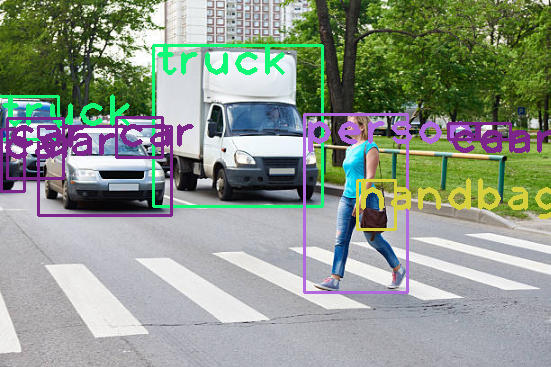

In [18]:
cv2_imshow(img)